# Preparing Numeric Data

Numeric data tends to be better-behaved than text data. There's only so many symbols that appear in numbers and they have well-defined values. Despite its relative cleanliness, there are variety of preprocessing tasks you should consider before using numeric data. In this lesson, we'll learn some common operations used to prepare numeric data for use in analysis and predictive models.

## Centering and Scaling

Numeric variables are often on different scales and cover different ranges, so they can't be easily compared. What's more, variables with large values can dominate those with smaller values when using certain modeling techniques. Centering and scaling is a common preprocessing task that puts numeric variables on a common scale so no single variable will dominate the others.

The simplest way to center data is to subtract the mean value from each data point. Subtracting the mean centers the data around zero and sets the new mean to zero. Let's try zero-centering the [mtcars dataset](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) that comes with the `ggplot` library:

In [ ]:
!pip install ggplot

In [37]:
%matplotlib inline

In [38]:
import numpy as np
import pandas as pd
from ggplot import mtcars

In [39]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [40]:
mtcars = mtcars[mtcars['mpg'].notnull()] # remove None rows

In [41]:
mtcars = mtcars.set_index('name')
print(mtcars.head())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
name                                                                         
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
name                     
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


We can apply a lambda function to every numerical column in the `DataFrame`.

In [42]:
centered = mtcars.apply(lambda x: x - x.mean())

centered.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,32.000000,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,32.000000,32.0000
mean,3.996803e-15,0.000000,-3.907985e-14,0.000000,-5.967449e-16,4.787837e-16,-2.609024e-15,0.000000,0.000000,0.000000,0.0000
std,6.026948e+00,1.785922,1.239387e+02,68.562868,5.346787e-01,9.784574e-01,1.786943e+00,0.504016,0.498991,0.737804,1.6152
min,-9.690625e+00,-2.187500,-1.596219e+02,-94.687500,-8.365625e-01,-1.704250e+00,-3.348750e+00,-0.437500,-0.406250,-0.687500,-1.8125
25%,-4.665625e+00,-2.187500,-1.098969e+02,-50.187500,-5.165625e-01,-6.360000e-01,-9.562500e-01,-0.437500,-0.406250,-0.687500,-0.8125
50%,-8.906250e-01,-0.187500,-3.442188e+01,-23.687500,9.843750e-02,1.077500e-01,-1.387500e-01,-0.437500,-0.406250,0.312500,-0.8125
75%,2.709375e+00,1.812500,9.527812e+01,33.312500,3.234375e-01,3.927500e-01,1.051250e+00,0.562500,0.593750,0.312500,1.1875
max,1.380938e+01,1.812500,2.412781e+02,188.312500,1.333437e+00,2.206750e+00,5.051250e+00,0.562500,0.593750,1.312500,5.1875


In [43]:
column_deviations = mtcars.std(axis='rows')   # Get standard deviations by feature

centered_and_scaled = centered/column_deviations 

print(centered_and_scaled.describe())

                mpg           cyl          disp            hp          drat  \
count  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01   
mean   6.678685e-16 -6.938894e-18 -2.949030e-16 -2.428613e-17 -1.113692e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.607883e+00 -1.224858e+00 -1.287910e+00 -1.381032e+00 -1.564608e+00   
25%   -7.741273e-01 -1.224858e+00 -8.867035e-01 -7.319924e-01 -9.661175e-01   
50%   -1.477738e-01 -1.049878e-01 -2.777331e-01 -3.454858e-01  1.841059e-01   
75%    4.495434e-01  1.014882e+00  7.687521e-01  4.858679e-01  6.049193e-01   
max    2.291272e+00  1.014882e+00  1.946754e+00  2.746567e+00  2.493904e+00   

                 wt          qsec            vs            am          gear  \
count  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01   
mean   4.909267e-16 -1.465841e-15  1.387779e-17  8.326673e-17 -5.030698e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.

Notice that after dividing by the standard deviation, every variable now has a standard deviation of 1. At this point, all the columns have roughly the same mean and scale of spread about the mean.

Manually centering and scaling as we've done is a good exercise, but it is often possible to perform common data preprocessing automatically using functions built into Python libraries. The Python library `scikit-learn`, a popular package for predictive modeling and data analysis, has preprocessing tools including a `scale()` function for centering and scaling data:

In [44]:
from sklearn import preprocessing

In [45]:
scaled_data = preprocessing.scale(mtcars)  # Scale the data*
 
scaled_cars = pd.DataFrame(scaled_data,    # Remake the DataFrame
                           index=mtcars.index,
                           columns=mtcars.columns)

print(scaled_cars.describe() )

                mpg           cyl          disp            hp          drat  \
count  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01   
mean  -5.481726e-16  4.163336e-17  1.387779e-16 -1.734723e-17 -3.122502e-16   
std    1.016001e+00  1.016001e+00  1.016001e+00  1.016001e+00  1.016001e+00   
min   -1.633610e+00 -1.244457e+00 -1.308518e+00 -1.403130e+00 -1.589643e+00   
25%   -7.865141e-01 -1.244457e+00 -9.008917e-01 -7.437050e-01 -9.815764e-01   
50%   -1.501383e-01 -1.066677e-01 -2.821771e-01 -3.510140e-01  1.870518e-01   
75%    4.567366e-01  1.031121e+00  7.810529e-01  4.936423e-01  6.145986e-01   
max    2.327934e+00  1.031121e+00  1.977904e+00  2.790515e+00  2.533809e+00   

                 wt          qsec            vs            am          gear  \
count  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01   
mean   4.683753e-17 -1.469311e-15 -6.938894e-18  5.551115e-17 -1.144917e-16   
std    1.016001e+00  1.016001e+00  1.016001e+00  1.

*Note: `preprocessing.scale()` returns `ndarrays` so we have to convert it back into a `DataFrame`.*
    
Notice that the values are almost the same as those we calculated manually but not exactly the same. These small differences are likely due to rounding and details of the `scikit-learn` implementation of centering and scaling.

## Dealing With Skewed Data

The distribution of data — its overall shape and how it is spread out — can have a significant impact on analysis and modeling. Data that is roughly evenly spread around the mean value — known as normally distributed data — tends to be well-behaved. On the other hand, some data sets exhibit significant skewness or asymmetry. To illustrate, let's generate a few distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e5c0a90>]], dtype=object)

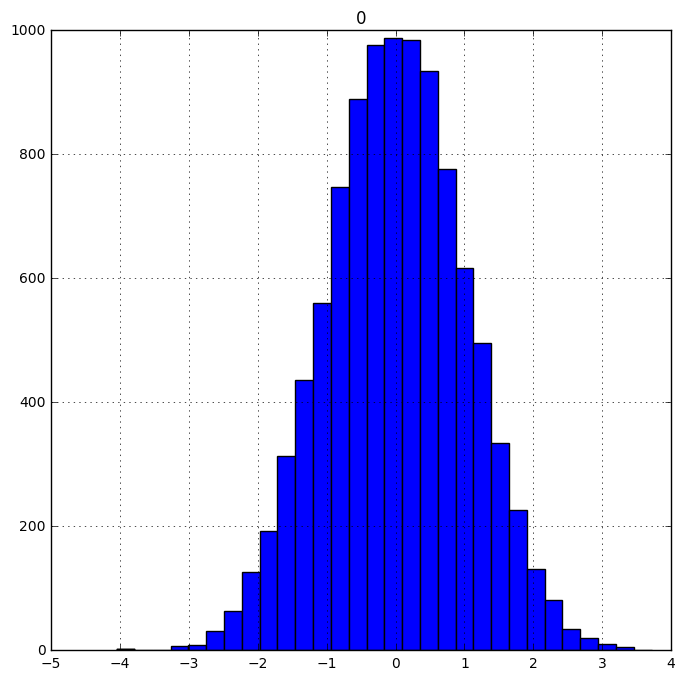

In [46]:
normally_distributed = np.random.normal(size=10000)  # Generate normal data

normally_distributed = pd.DataFrame(normally_distributed) # Convert to DF

normally_distributed.hist(figsize=(8,8),                  # Plot histogram
                          bins=30)                               

   
Notice how the normally distributed data looks roughly symmetric with a bell-shaped curve. Now let's generate some skewed data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ed15da0>]], dtype=object)

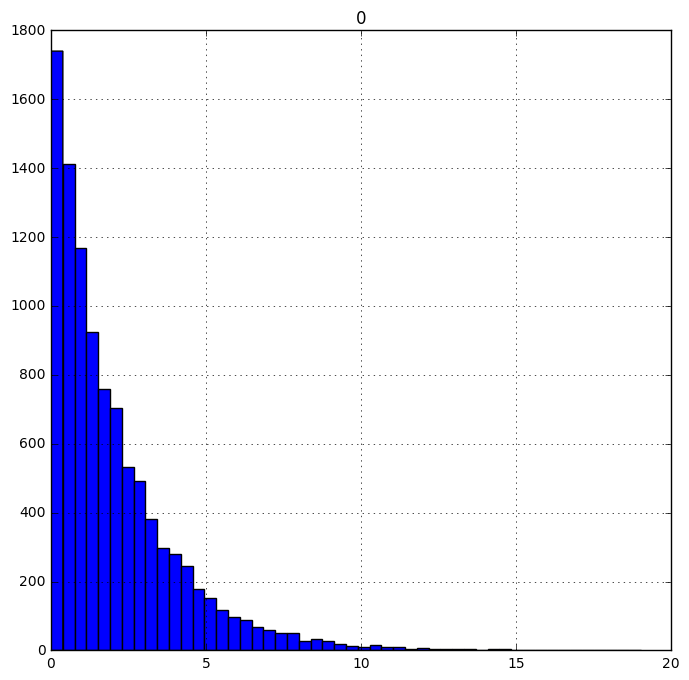

In [47]:
skewed = np.random.exponential(scale=2,      # Generate skewed data
                               size= 10000)  

skewed = pd.DataFrame(skewed)                # Convert to DF

skewed.hist(figsize=(8,8),                   # Plot histogram
            bins=50)                               

Data with a long tail that goes off to the right is called positively skewed or right skewed. When you have a skewed distribution like the one above, the extreme values in the long tail can have a disproportionately large influence on whatever test you perform or models you build. Reducing skew may improve your results. Taking the square root of each data point or taking the natural logarithm of each data point are two simple transformations that can reduce skew. Let's see their effects on the skewed data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11eda7be0>]], dtype=object)

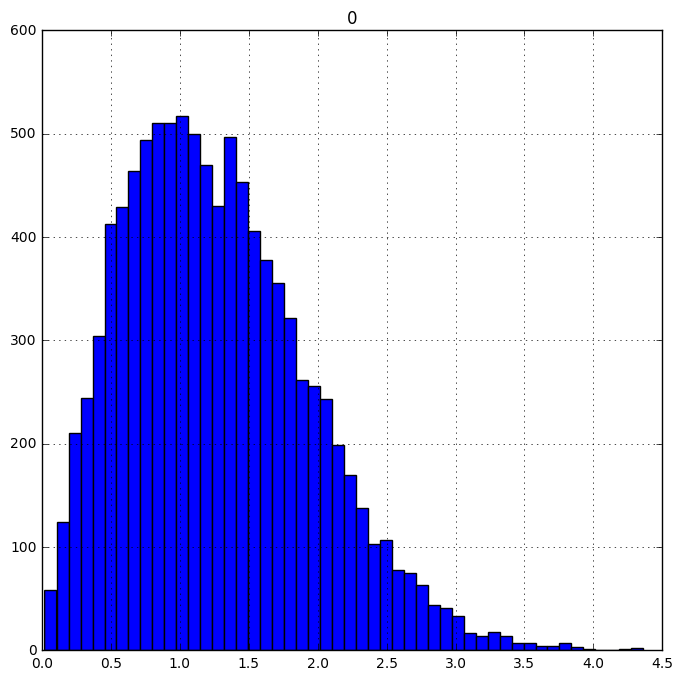

In [48]:
sqrt_transformed = skewed.apply(np.sqrt) # Get the square root of data points*

sqrt_transformed.hist(figsize=(8,8),     # Plot histogram
                 bins=50)                 

*Note: The `df.apply()` function applies a given function to each row or column of the `DataFrame`. In this case we pass in `np.sqrt` to get the square root of each value.*

Now let's look at a log transformation:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f33d8d0>]], dtype=object)

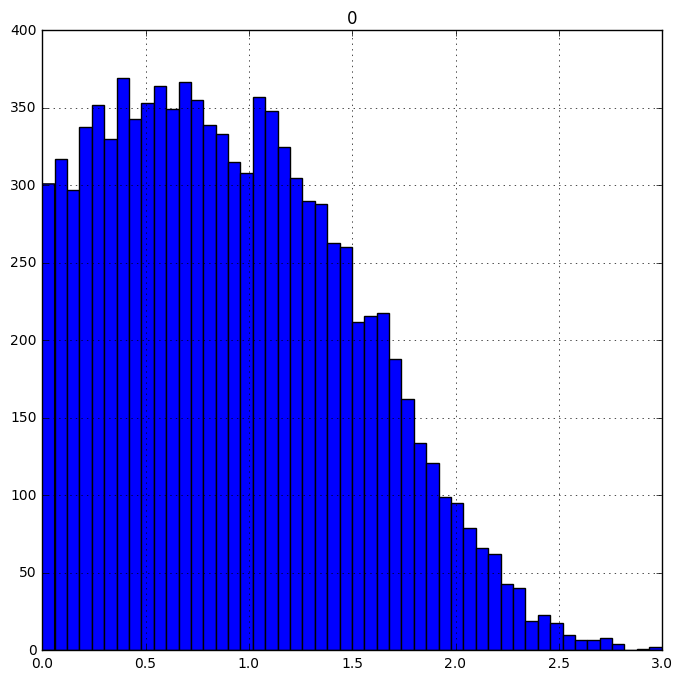

In [49]:
log_transformed = (skewed+1).apply(np.log)   # Get the log of the data*

log_transformed.hist(figsize = (8,8),          # Plot histogram
                 bins=50)                 

*Note: Adding 1 before taking the log ensures we don't end up with negative values. Also note that neither of these transformations work on data containing negative values. To make them work on data with negative values add a constant to each value that is large enough to make all the data greater than or equal to 1 (such as adding the absolute value of the smallest number +1)*

Both the `sqrt()` and `log()` transforms reduced the skew of the data. It's still not quite normally distributed, but the amount of extreme data in the tails has been reduced to the point where we might not be so worried about it having a large influence on our results.

## Highly Correlated Variables

In predictive modeling, each variable you use to construct a model would ideally represent some unique feature of the data. In other words, you want each variable to tell you something different. In reality, variables often exhibit collinearity — a strong correlation or tendency to move together, typically due to some underlying similarity or common influencing factor. Variables with strong correlations can interfere with one another when performing modeling and muddy results.

You can check the pairwise correlations between numeric variables using the `df.corr()` function:

In [50]:
mtcars.ix[:,0:6].corr()   # Check the pairwise correlations of 6 variables

,mpg,cyl,disp,hp,drat,wt
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000


A positive correlation implies that when one variable goes up the other tends to go up as well. Negative correlations indicate an inverse relationship: when one variable goes up the other tends to go down. A correlation near zero indicates low correlation while a correlation near -1 or 1 indicates a large negative or positive correlation.

Inspecting the data table, we see that the number of cylinders a car has (`cyl`) and its weight (`wt`) have fairly strong negative correlations to gas mileage (`mpg.`). This indicates that heavier cars and cars with more cylinders tend to get lower gas mileage.

A scatter plot matrix can be a helpful visual aide for inspecting collinearity. We can create one with the pandas `scatter_matrix()` function located in the `tools.plotting` pandas module:

In [51]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f5f6208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1207dc0f0>]], dtype=object)

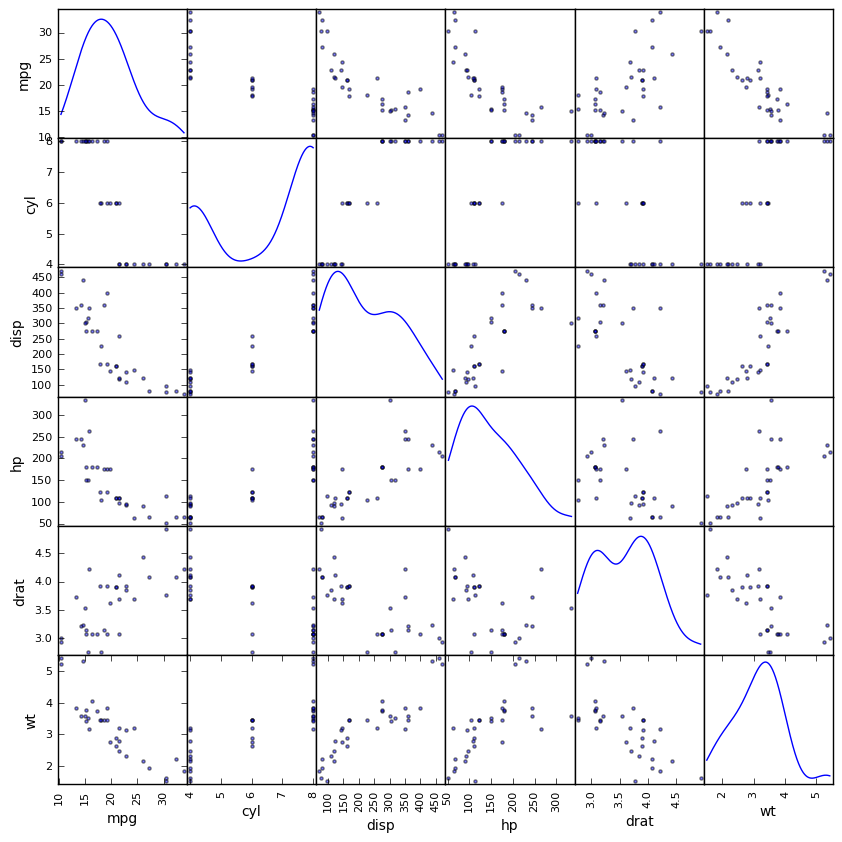

In [52]:
scatter_matrix(mtcars.ix[:,0:6],   # Make a scatter matrix of 6 columns
               figsize=(10, 10),   # Set plot size
               diagonal='kde')     # Show distribution estimates on diagonal

A scatter plot matrix creates pairwise scatter plots that let you visually inspect the relationships between pairs of variables. It can also help identify oddities in the data, such as variables like cyl that only take on values in a small discrete set.

If you find highly correlated variables, there are a few things you can do including:

1. Leave them be
2. Remove one or more variables
3. Combine them in some way

Reducing the number of variables under consideration, either by removing some or by combining them some way is known as "dimensionality reduction." How you choose to handle correlated variables is ultimately a subjective decision that should be informed by your goal.

## Imputing with Sklearn

In the lesson on initial data exploration, we explored Titanic survivor data and found that several passengers had missing listed for age. Missing values in numeric data are troublesome because you can't simply treat them as a category: you have to either remove them or fill them in.

Imputation describes filling in missing data with estimates based on the rest of the data set. When working with the titanic data set, we set all the missing `Age` values to the median age for the data set. Other simple imputation methods include setting missing values to the mean or most common value (mode). The scikit-learn offers an `Imupter` tool that can automatically carry out these imputations for us. Let's start by loading the `Imputer` and introducing some missing values into the `mpg` data:

In [53]:
from sklearn.preprocessing import Imputer

In [54]:
# The following line sets a few mpg values to None
mtcars["mpg"] = np.where(mtcars["mpg"]>22, None, mtcars["mpg"])

mtcars["mpg"]        # Confirm that missing values were added

name
Mazda RX4                21
Mazda RX4 Wag            21
Datsun 710             None
Hornet 4 Drive         21.4
Hornet Sportabout      18.7
Valiant                18.1
Duster 360             14.3
Merc 240D              None
Merc 230               None
Merc 280               19.2
Merc 280C              17.8
Merc 450SE             16.4
Merc 450SL             17.3
Merc 450SLC            15.2
Cadillac Fleetwood     10.4
Lincoln Continental    10.4
Chrysler Imperial      14.7
Fiat 128               None
Honda Civic            None
Toyota Corolla         None
Toyota Corona          21.5
Dodge Challenger       15.5
AMC Javelin            15.2
Camaro Z28             13.3
Pontiac Firebird       19.2
Fiat X1-9              None
Porsche 914-2          None
Lotus Europa           None
Ford Pantera L         15.8
Ferrari Dino           19.7
Maserati Bora            15
Volvo 142E             21.4
Name: mpg, dtype: object

Now let's use the Imputer fill in missing values based on the mean:

In [55]:
imp = Imputer(missing_values='NaN',  # Create imputation model
              strategy='mean',       # Use mean imputation
              axis=0)                # Impute by column

imputed_cars = imp.fit_transform(mtcars)   # Use imputation model to get values

imputed_cars = pd.DataFrame(imputed_cars,  # Remake DataFrame with new values
                           index=mtcars.index,
                           columns = mtcars.columns)

imputed_cars.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.000000,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.000000,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,17.065217,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.400000,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.700000,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.100000,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.300000,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,17.065217,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,17.065217,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0


Currently the `Imputer` only supports the "`mean`", "`median`" and "`most_frequent`" (mode) as strategies for imputation.

Other imputation methods include filling in values based on "similar" or "neighboring" records (K-nearest-neighbors imputation) and filling in values based on regression models. Using predictive models to fill in missing values adds an extra layer of complexity to an analysis and can significantly increase processing time, although it may result in better predictive performance.

## Wrap Up

In the past two lessons, we covered a variety of methods for preparing text data and numeric data. The majority of data you encounter will likely fall in one of these two categories, but there is one other type of data that appears with enough frequency that you will have to deal with it sooner or later: dates.